# 디벨롭 드가자

## 데이터 불러오기

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/data/insurance_dataset.csv')
data.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         749238 non-null   object 
 7   family_medical_history  749596 non-null   object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [28]:
data.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


## EDA

In [29]:
cat = data.select_dtypes(include=['object']).columns
num = data.select_dtypes(exclude=['object']).columns

In [30]:
data_cat = data[cat]  # 범주형 구분
data_num = data[num]  # 수치형 구분

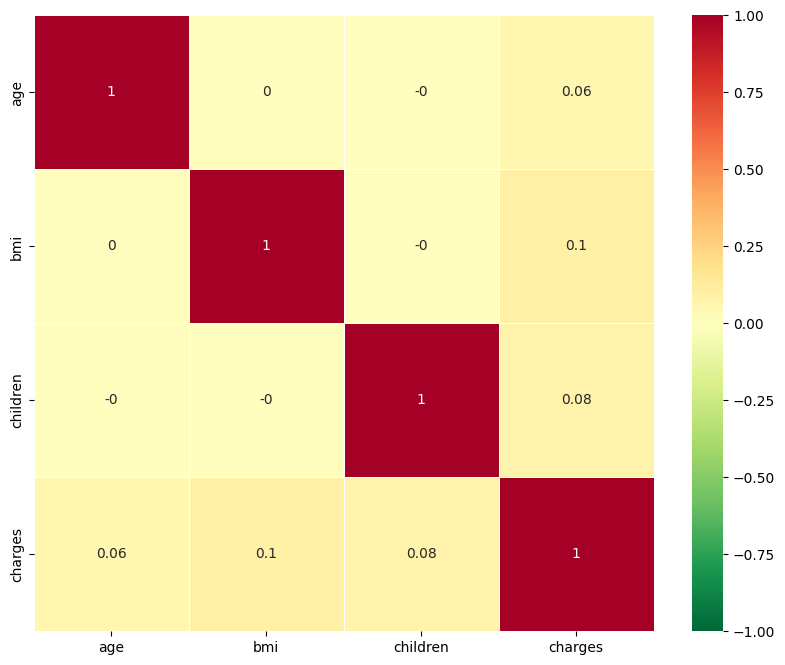

In [31]:
corr = data_num.corr().round(2)
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap='RdYlGn_r', vmin=-1, vmax=1, linewidths=0.5)
plt.show()

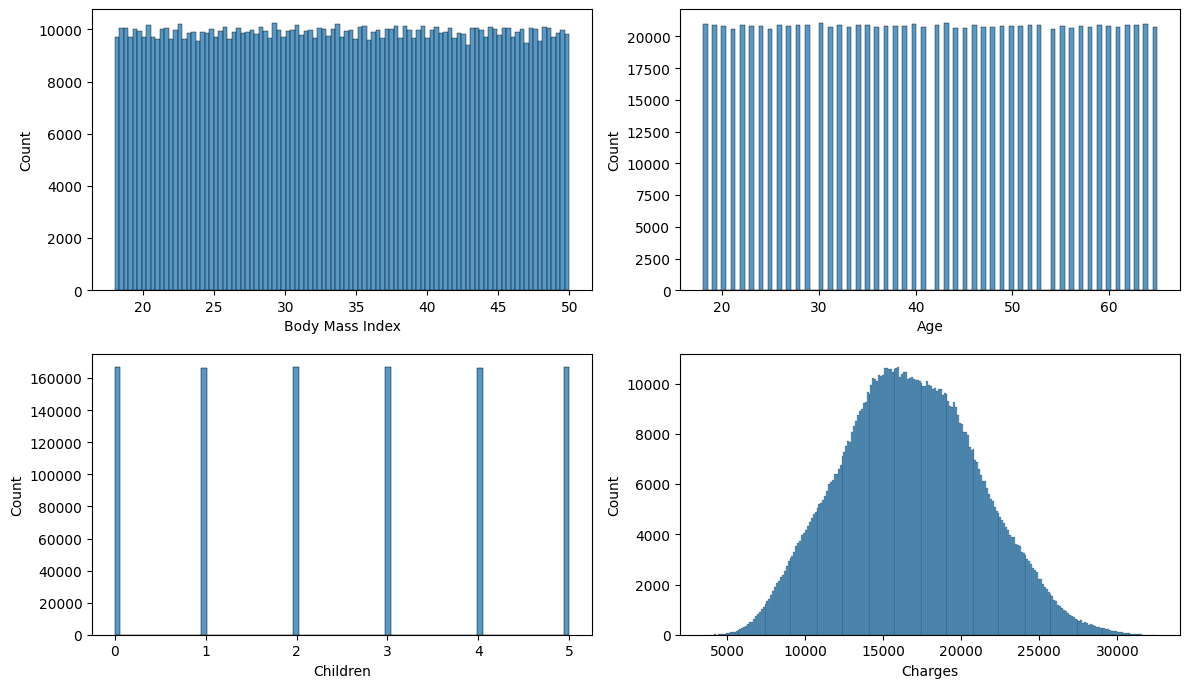

In [32]:
#수치형 변수들 분포 확인
plt.figure(figsize = (12, 10))

plt.subplot(3, 2, 2)
sns.histplot(x = data['age'], kde = False)
plt.xlabel('Age')

plt.subplot(3, 2, 1)
sns.histplot(x = data['bmi'], kde = False)
plt.xlabel('Body Mass Index')

plt.subplot(3, 2, 3)
sns.histplot(x = data['children'], kde = False)
plt.xlabel('Children')

plt.subplot(3, 2, 4)
sns.histplot(x = data['charges'], kde = False)
plt.xlabel('Charges')

plt.tight_layout()  # 여백 조정
plt.show()

<Axes: xlabel='coverage_level', ylabel='count'>

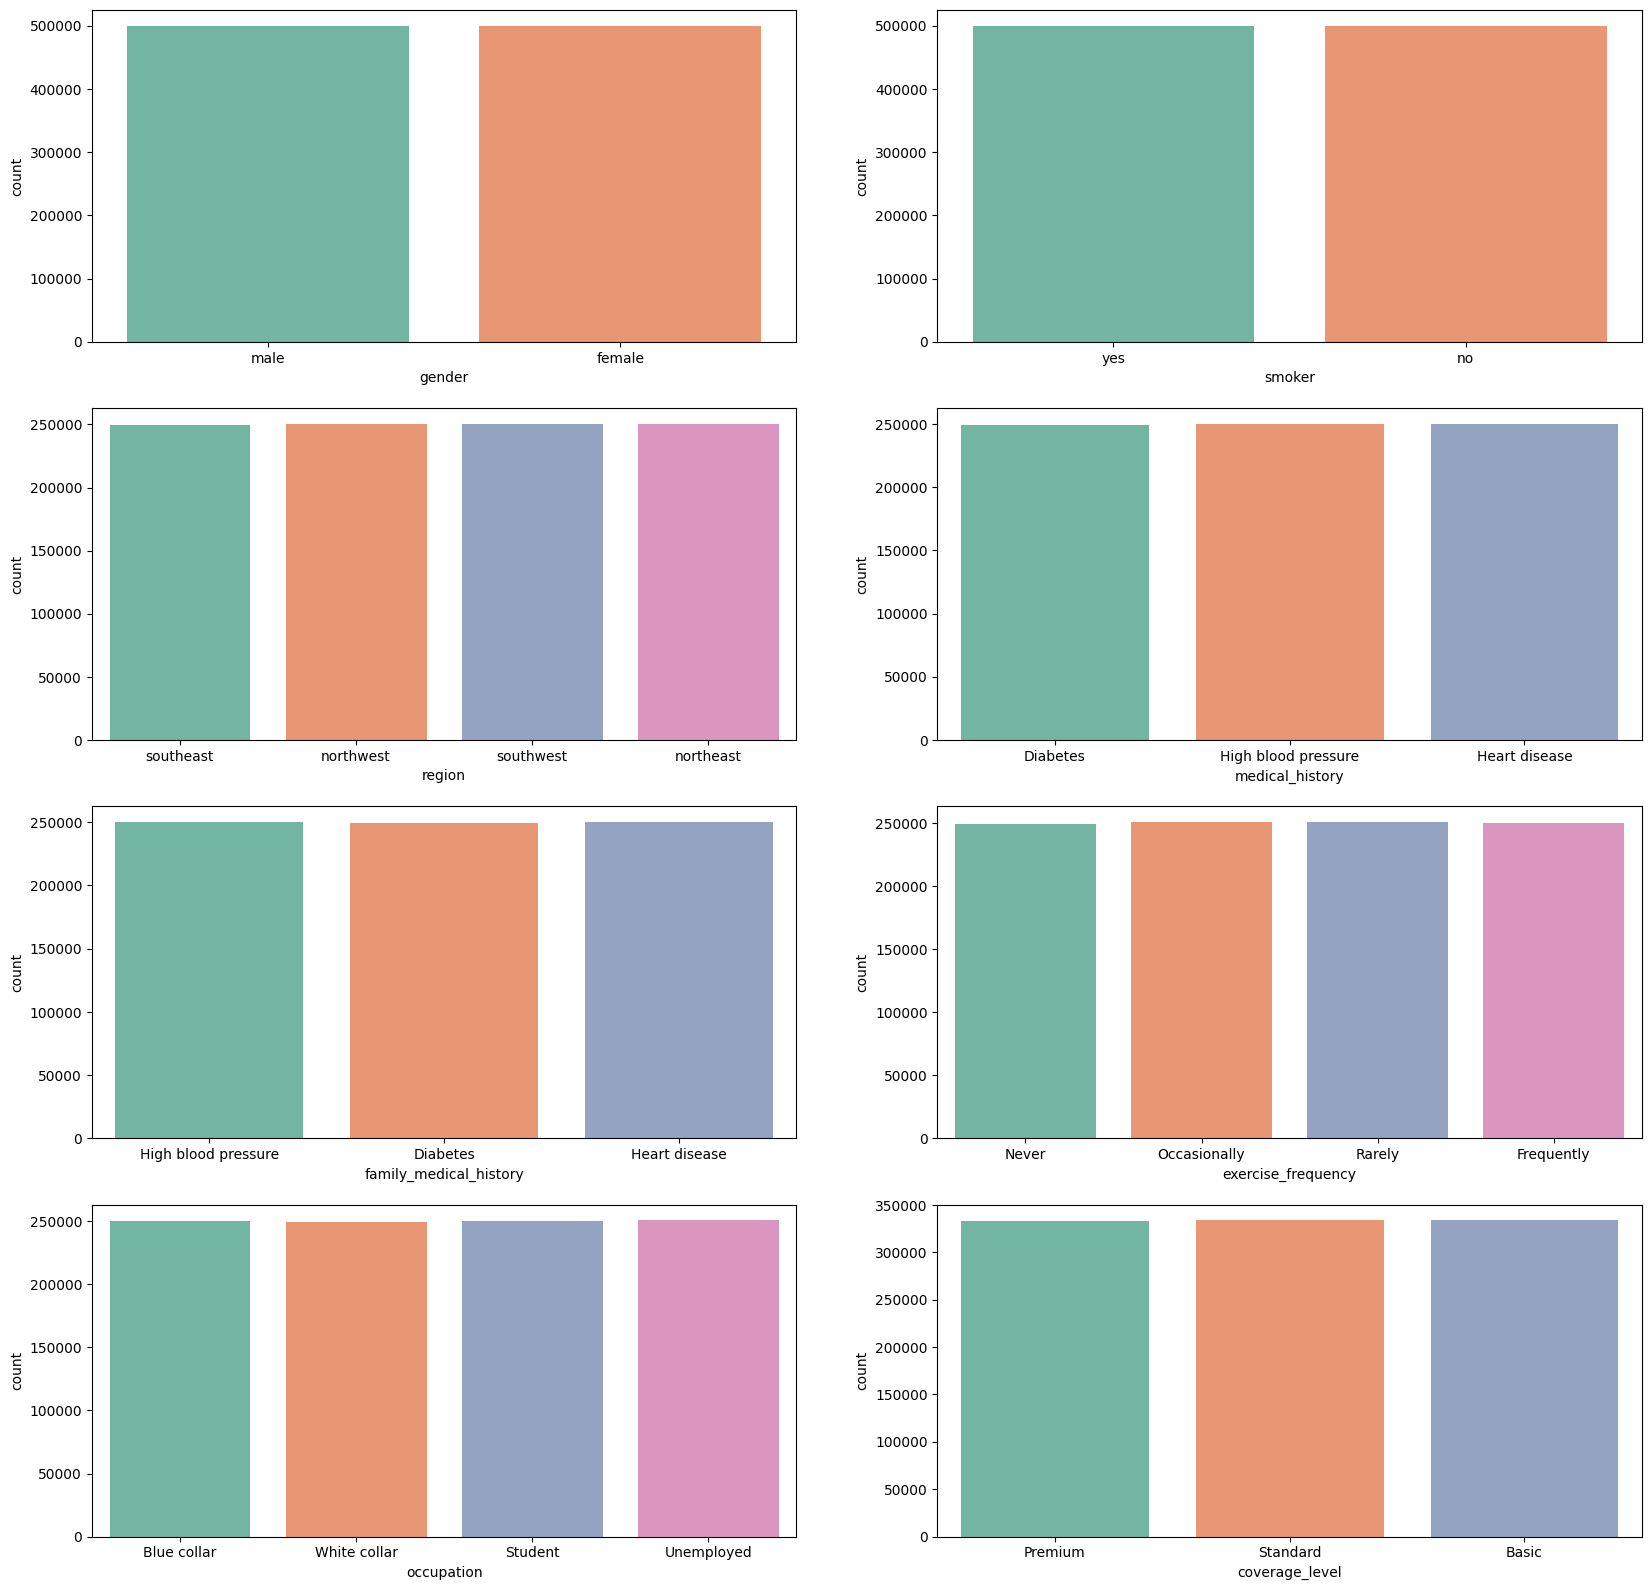

In [33]:
#문자열 변수들 분포 확인
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
sns.countplot(x = 'gender', palette = 'Set2', data = data)

plt.subplot(5, 2, 2)
sns.countplot(x = 'smoker', palette = 'Set2', data = data)

plt.subplot(5, 2, 3)
sns.countplot(x = 'region', palette = 'Set2', data = data)

plt.subplot(5, 2, 4)
sns.countplot(x = 'medical_history', palette = 'Set2', data = data)

plt.subplot(5, 2, 5)
sns.countplot(x = 'family_medical_history', palette = 'Set2', data = data)

plt.subplot(5, 2, 6)
sns.countplot(x = 'exercise_frequency', palette = 'Set2', data = data)

plt.subplot(5, 2, 7)
sns.countplot(x = 'occupation', palette = 'Set2', data = data)

plt.subplot(5, 2, 8)
sns.countplot(x = 'coverage_level', palette = 'Set2', data = data)

In [34]:
data

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,NaN,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,NaN,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


## 데이터 전처리

### 1) 결측치 처리

In [35]:
# 전체 결측치 개수
print(data.isnull().sum())

age                            0
gender                         0
bmi                            0
children                       0
smoker                         0
region                         0
medical_history           250762
family_medical_history    250404
exercise_frequency             0
occupation                     0
coverage_level                 0
charges                        0
dtype: int64


In [36]:
# NaN 값을 "No History"로 채우기
data['medical_history'].fillna('No History', inplace=True)
data['family_medical_history'].fillna('No History', inplace=True)

# Dummy Variable (더미 변수)로 변환
medical_dummies = pd.get_dummies(data['medical_history'], prefix='medical', dummy_na=False, drop_first=True)
family_dummies = pd.get_dummies(data['family_medical_history'], prefix='family', dummy_na=False, drop_first=True)

# 데이터프레임에 추가
data = pd.concat([data, medical_dummies, family_dummies], axis=1)

# 기존 칼럼 삭제
data.drop(['medical_history', 'family_medical_history'], axis=1, inplace=True)

In [37]:
data

,age,gender,bmi,children,smoker,region,exercise_frequency,occupation,coverage_level,charges,medical_Heart disease,medical_High blood pressure,medical_No History,family_Heart disease,family_High blood pressure,family_No History
0,46,male,21.45,5,yes,southeast,Never,Blue collar,Premium,20460.307669,False,False,False,False,False,True
1,25,female,25.38,2,yes,northwest,Occasionally,White collar,Premium,20390.899218,False,False,False,False,True,False
2,38,male,44.88,2,yes,southwest,Occasionally,Blue collar,Premium,20204.476302,False,False,True,False,True,False
3,25,male,19.89,0,no,northwest,Rarely,White collar,Standard,11789.029843,False,False,True,False,False,False
4,49,male,38.21,3,yes,northwest,Rarely,White collar,Standard,19268.309838,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,Frequently,Student,Basic,11584.134900,False,True,False,False,False,True
999996,33,male,36.83,2,no,northeast,Frequently,Unemployed,Basic,9834.871456,False,False,True,False,True,False
999997,39,male,39.84,0,yes,northeast,Rarely,Blue collar,Standard,22076.632856,True,False,False,False,True,False
999998,37,female,45.06,4,yes,northeast,Occasionally,Unemployed,Premium,20297.618728,False,True,False,False,False,False


### 2) 더미 변수 변환

In [38]:
# 범주형 칼럼 자동 선택
categorical_columns = data.select_dtypes(include=['object','category']).columns

# 더미 변수로 변환
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [39]:
data

,age,bmi,children,charges,medical_Heart disease,medical_High blood pressure,medical_No History,family_Heart disease,family_High blood pressure,family_No History,...,region_southeast,region_southwest,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Premium,coverage_level_Standard
0,46,21.45,5,20460.307669,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,True,False
1,25,25.38,2,20390.899218,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,True,False
2,38,44.88,2,20204.476302,False,False,True,False,True,False,...,False,True,False,True,False,False,False,False,True,False
3,25,19.89,0,11789.029843,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,49,38.21,3,19268.309838,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,46.67,2,11584.134900,False,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
999996,33,36.83,2,9834.871456,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,False,False
999997,39,39.84,0,22076.632856,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
999998,37,45.06,4,20297.618728,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False


### 3) 불필요한 변수 삭제

In [40]:
data.columns

Index(['age', 'bmi', 'children', 'charges', 'medical_Heart disease',
       'medical_High blood pressure', 'medical_No History',
       'family_Heart disease', 'family_High blood pressure',
       'family_No History', 'gender_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest', 'exercise_frequency_Never',
       'exercise_frequency_Occasionally', 'exercise_frequency_Rarely',
       'occupation_Student', 'occupation_Unemployed',
       'occupation_White collar', 'coverage_level_Premium',
       'coverage_level_Standard'],
      dtype='object')

In [41]:
data.drop(['age', 'gender_male','children', 'medical_High blood pressure', 'medical_No History', 'family_High blood pressure','family_No History','region_northwest','region_southeast', 'region_southwest', 'exercise_frequency_Never','exercise_frequency_Occasionally', 'exercise_frequency_Rarely','occupation_Student', 'occupation_Unemployed','occupation_White collar','coverage_level_Standard'], axis=1, inplace=True)

In [42]:
data

,bmi,charges,medical_Heart disease,family_Heart disease,smoker_yes,coverage_level_Premium
0,21.45,20460.307669,False,False,True,True
1,25.38,20390.899218,False,False,True,True
2,44.88,20204.476302,False,False,True,True
3,19.89,11789.029843,False,False,False,False
4,38.21,19268.309838,False,False,True,False
...,...,...,...,...,...,...
999995,46.67,11584.134900,False,False,False,False
999996,36.83,9834.871456,False,False,False,False
999997,39.84,22076.632856,True,False,True,False
999998,45.06,20297.618728,False,False,True,True


## Train Test

In [43]:
from sklearn.model_selection import train_test_split

# 주요 변수로 회귀 분석
X = data.drop(columns=['charges'])
y = data['charges']

# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# 모델 학습 및 평가
def train_and_evaluate(X_train, X_test, y_train, y_test, method):
    model = LinearRegression()
    model.fit(X_train, y_train)

    # R² 계산
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))

    print(f"{method} Method:")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test  R²: {test_r2:.4f}")
    print("-" * 30)
# 더미 변수로 처리한 데이터
train_and_evaluate(X_train, X_test, y_train, y_test, method="Dummy Variable")

Dummy Variable Method:
  Train R²: 0.8224
  Test  R²: 0.8217
------------------------------


## Machine Learning

### 1) Linear Regression

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# 결과 출력
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² (Coefficient of Determination): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 3469046.60253378
Mean Absolute Error (MAE): 1498.073018736444
R² (Coefficient of Determination): 0.8217411149431992
Root Mean Squared Error (RMSE): 1862.5376781514462


### 2) Lidge Regression

In [47]:
from sklearn.linear_model import Ridge
import numpy as np

# 릿지 회귀 모델 생성 (alpha=1.0은 기본값)
ridge_model = Ridge(alpha=1.0)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# 결과 출력
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² (Coefficient of Determination): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 3469046.5487030633
Mean Absolute Error (MAE): 1498.072965573439
R² (Coefficient of Determination): 0.8217411177093205
Root Mean Squared Error (RMSE): 1862.5376637005393


### 3) Lasso

In [48]:
from sklearn.linear_model import Lasso

# 라쏘 회귀 모델 생성
lasso_model = Lasso(alpha=1.0)  # alpha 값은 튜닝 가능
lasso_model.fit(X_train, y_train)

# 예측 및 평가
y_pred = lasso_model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)


# 결과 출력
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² (Coefficient of Determination): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 3469057.8791766334
Mean Absolute Error (MAE): 1498.0685218247097
R² (Coefficient of Determination): 0.8217405354866474
Root Mean Squared Error (RMSE): 1862.5407053744177


## 변수 중요도

In [25]:
from sklearn.ensemble import RandomForestRegressor

# X: 독립 변수, y: 종속 변수
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 변수 중요도 추출
feature_importances = model.feature_importances_

# 데이터프레임으로 정리 (변수 이름과 중요도)
importance_data = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_data)

                   Feature  Importance
3               smoker_yes    0.369944
5   coverage_level_Premium    0.210744
1    medical_Heart disease    0.178037
2     family_Heart disease    0.177511
0                      bmi    0.044051
4  occupation_White collar    0.019713
